In [42]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)

In [43]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

In [44]:
import numpy as np

In [45]:
import matplotlib.pylab as plt

In [46]:
x = np.arange(0.0, 20.0, 0.1) #0から20まで、0.1刻みのx配列

In [47]:
y = function_1(x)

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


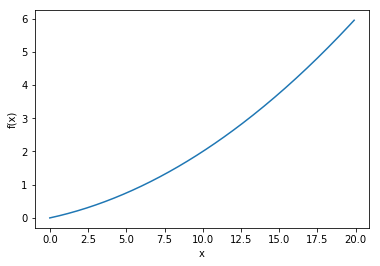

In [48]:
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,  y)
plt.show()

In [49]:
numerical_diff(function_1, 5)

0.1999999999990898

In [50]:
numerical_diff(function_1, 10)

0.2999999999986347

# 偏微分

In [51]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

In [52]:
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0

In [53]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [54]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

In [55]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

# 勾配　

In [1]:
# 勾配とはすべての変数の偏微分をベクトルとしてまとめたもの

In [59]:
def numerical_gradient(f, x):

    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # xと同じ形状の配列を生成

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x + h)の計算
        x[idx] = tmp_val + h
        fx_h1 = f(x)

        # f(x - h)の計算
        x[idx] = tmp_val - h
        fx_h2 = f(x)

        grad[idx] = (fx_h1 - fx_h2) / (h * 2)
        x[idx] = tmp_val # 値をもとに戻す

    return grad

In [60]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [62]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [63]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [ ]:
# p105

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


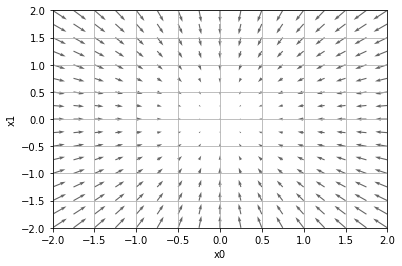

In [64]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad

# 勾配を求める関数
def numerical_gradient(f, X):
    if X.ndim == 1: # 1次元にも対応
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X) # xと同じ形状の配列を作成
        
        for idx, x in enumerate(X): # enumerate関数を用いると,[インデックス番号、要素]が取得できる
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


# y = x0 ** 2 + x1 **2 の関数    
def function_2(x):
    if x.ndim == 1: # 1次元配列の場合とそう出ない場合で場合分け(ndimで次元数を取得)
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

# メイン処理
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)

    # 格子点を生成
    X, Y = np.meshgrid(x0, x1)
    
    # ネストされた配列を１次元配列にフラット化
    X = X.flatten()
    Y = Y.flatten()
    
    # 勾配(gardient)を求める
    grad = numerical_gradient(function_2, np.array([X, Y]).T).T
    
    # グラフの描画
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()